<h2># Project Akhir </h2>

<table align="left">
    <tr>
        <td style="text-align:left">Kode Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">12S3205</td>
    </tr>
    <tr>
        <td style="text-align:left">Nama Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">Data Mining</td>
    </tr>
    <tr>
        <td style="text-align:left">Case 4</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>Location-based species presence
prediction</i></td>
    </tr>
    <tr>
        <td style="text-align:left">Kelompok 5</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">
            <ul style="margin:0; padding-left:15px;">
                <li><i>12S22032 – Samuel Janring Sitio</i></li>
                <li><i>12S22033 – Mickael Heri Sintompul</i></li>
                <li><i>12S22035 – Brain Wondeson Sitorus</i></li>
            </ul>
        </td>
    </tr>
</table>


# Data Understanding


### Presence-Absence (PA) surveys

In [ ]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import   train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, precision_score , recall_score, classification_report

####  Import dan Load Data

In [ ]:
df_PA = pd.read_csv("/content/sample_data/GLC25_P0_metadata_train.csv") # Presence-Absence
df_PO = pd.read_csv("/content/sample_data/GLC25_PA_metadata_train.csv") # Presence-Only

In [ ]:
df_PA.head()

,publisher,year,month,day,lat,lon,geoUncertaintyInM,taxonRank,date,dayOfYear,speciesId,surveyId
0,Pl@ntNet,2019,5.0,5.0,43.74605,1.573057,6.0,SPECIES,2019-05-05,125.0,3383.0,1.0
1,Pl@ntNet,2021,3.0,17.0,42.12559,0.314948,5.0,SPECIES,2021-03-17,76.0,1152.0,2.0
2,Pl@ntNet,2021,6.0,5.0,48.29520,-0.934518,24.9,SPECIES,2021-06-05,156.0,6772.0,3.0
3,iNaturalist.org,2021,6.0,9.0,53.63367,-2.644535,8.0,SPECIES,2021-06-09,160.0,3318.0,4.0
4,iNaturalist.org,2021,4.0,1.0,49.79471,7.925086,15.0,SPECIES,2021-04-01,91.0,3374.0,5.0


In [ ]:
df_PA.tail()

,publisher,year,month,day,lat,lon,geoUncertaintyInM,taxonRank,date,dayOfYear,speciesId,surveyId
4860272,Pl@ntNet,2021,5.0,28.0,47.69521,9.268853,6.00,SPECIES,2021-05-28,148.0,3109.0,3750141.0
4860273,Observation.org,2020,8.0,5.0,47.16398,13.480160,26.00,SPECIES,2020-08-05,218.0,3597.0,3750142.0
4860274,Pl@ntNet,2021,7.0,22.0,37.02985,-7.911103,9.64,SPECIES,2021-07-22,203.0,1843.0,3750143.0
4860275,Miljøstyrelsen / The Danish Environmental Prot...,2021,8.0,12.0,55.34669,10.350510,3.00,SPECIES,2021-08-12,224.0,10024.0,3750144.0
4860276,Miljøstyrelsen / The Danish Environmental Prot...,2021,8.0,12.0,55.34669,10.350500,NaN,NaN,NaN,NaN,NaN,NaN


#### Statistik Deskriptif

In [ ]:
df_PA.describe()

,year,month,day,lat,lon,geoUncertaintyInM,dayOfYear,speciesId,surveyId
count,4.860277e+06,4.859812e+06,4.858539e+06,4.860277e+06,4.860277e+06,4.860276e+06,4.860276e+06,4.860276e+06,4.860276e+06
mean,2.019691e+03,6.667938e+00,1.587810e+01,5.093352e+01,7.197307e+00,1.959954e+01,1.874014e+02,5.547532e+03,1.874171e+06
std,1.277152e+00,2.055863e+00,8.849551e+00,6.327426e+00,6.459550e+00,2.060949e+01,6.251904e+01,3.265900e+03,1.082110e+06
min,2.017000e+03,1.000000e+00,1.000000e+00,3.456858e+01,-1.053904e+01,1.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.019000e+03,5.000000e+00,8.000000e+00,4.622145e+01,3.029719e+00,5.000000e+00,1.440000e+02,2.703000e+03,9.372190e+05
50%,2.020000e+03,7.000000e+00,1.600000e+01,5.087189e+01,8.152730e+00,1.000000e+01,1.850000e+02,5.499000e+03,1.872998e+06
75%,2.021000e+03,8.000000e+00,2.400000e+01,5.592771e+01,1.103252e+01,2.500000e+01,2.310000e+02,8.422000e+03,2.810299e+06
max,2.021000e+03,1.200000e+01,3.100000e+01,7.118392e+01,3.455792e+01,9.800000e+01,3.660000e+02,1.125400e+04,3.750144e+06


In [ ]:
df_PA.shape

(4860277, 12)

In [ ]:
df_PA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860277 entries, 0 to 4860276
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   publisher          object 
 1   year               int64  
 2   month              float64
 3   day                float64
 4   lat                float64
 5   lon                float64
 6   geoUncertaintyInM  float64
 7   taxonRank          object 
 8   date               object 
 9   dayOfYear          float64
 10  speciesId          float64
 11  surveyId           float64
dtypes: float64(8), int64(1), object(3)
memory usage: 445.0+ MB


#### Missing Values

In [ ]:
print(df_PA.isnull().sum())

print(df_PA.duplicated().sum())

# Mengecek nilai unik di setiap kolom
for col in df_PA.columns:
    print(f"{col}: {df_PA[col].nunique()} nilai unik")


publisher               0
year                    0
month                 465
day                  1738
lat                     0
lon                     0
geoUncertaintyInM       1
taxonRank               1
date                    1
dayOfYear               1
speciesId               1
surveyId                1
dtype: int64
64758
publisher: 12 nilai unik
year: 5 nilai unik
month: 12 nilai unik
day: 31 nilai unik
lat: 1629464 nilai unik
lon: 2869975 nilai unik
geoUncertaintyInM: 9745 nilai unik
taxonRank: 2 nilai unik
date: 1826 nilai unik
dayOfYear: 366 nilai unik
speciesId: 9654 nilai unik
surveyId: 3679373 nilai unik


##### Distribusi Lokasi

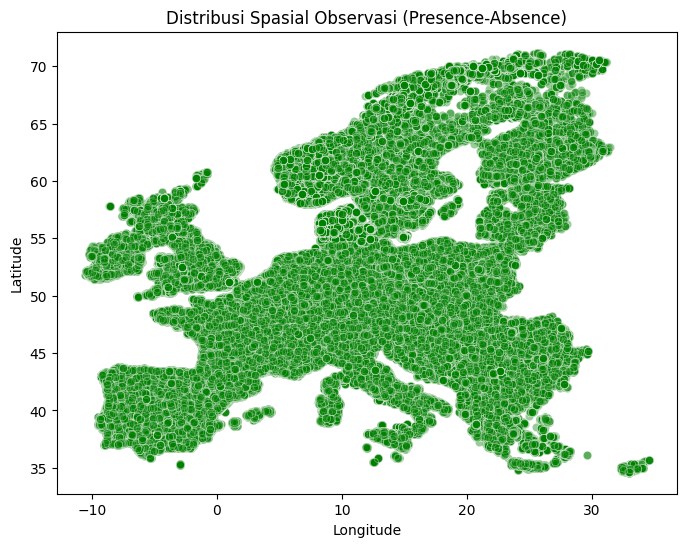

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='lon', y='lat', data=df_PA, alpha=0.4, color='green')
plt.title('Distribusi Spasial Observasi (Presence-Absence)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Penjelasan :** Plot ini menunjukkan sebaran lokasi pengamatan (presence atau absence) pada data `df_PA` di seluruh wilayah Eropa. Warna hijau dengan transparansi (alpha=0.4) digunakan untuk memvisualisasikan banyaknya observasi, sehingga area yang lebih padat akan tampak lebih gelap. Hal ini membantu mengidentifikasi area dengan konsentrasi pengamatan yang tinggi maupun rendah secara spasial.

##### Distribusi Tahun dan Bulan

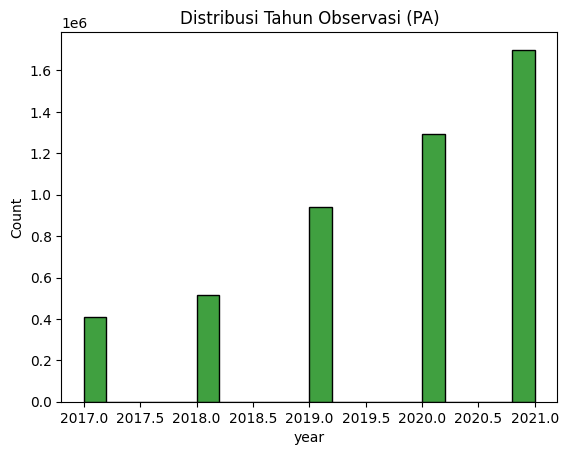

In [ ]:
sns.histplot(df_PA['year'].dropna(), bins=20, kde=False, color='green')
plt.title('Distribusi Tahun Observasi (PA)')
plt.show()

**Penjelasan :** Histogram ini menggambarkan tren peningkatan jumlah observasi dari tahun ke tahun, dimulai dari 2017 hingga 2021. Terlihat bahwa jumlah observasi meningkat secara signifikan, dengan puncaknya terjadi pada tahun 2021. Hal ini bisa menunjukkan adanya peningkatan aktivitas pengumpulan data atau kemajuan dalam sistem pencatatan dan pelaporan pada tahun-tahun terakhir.

##### Distribusi Kolom Numerik

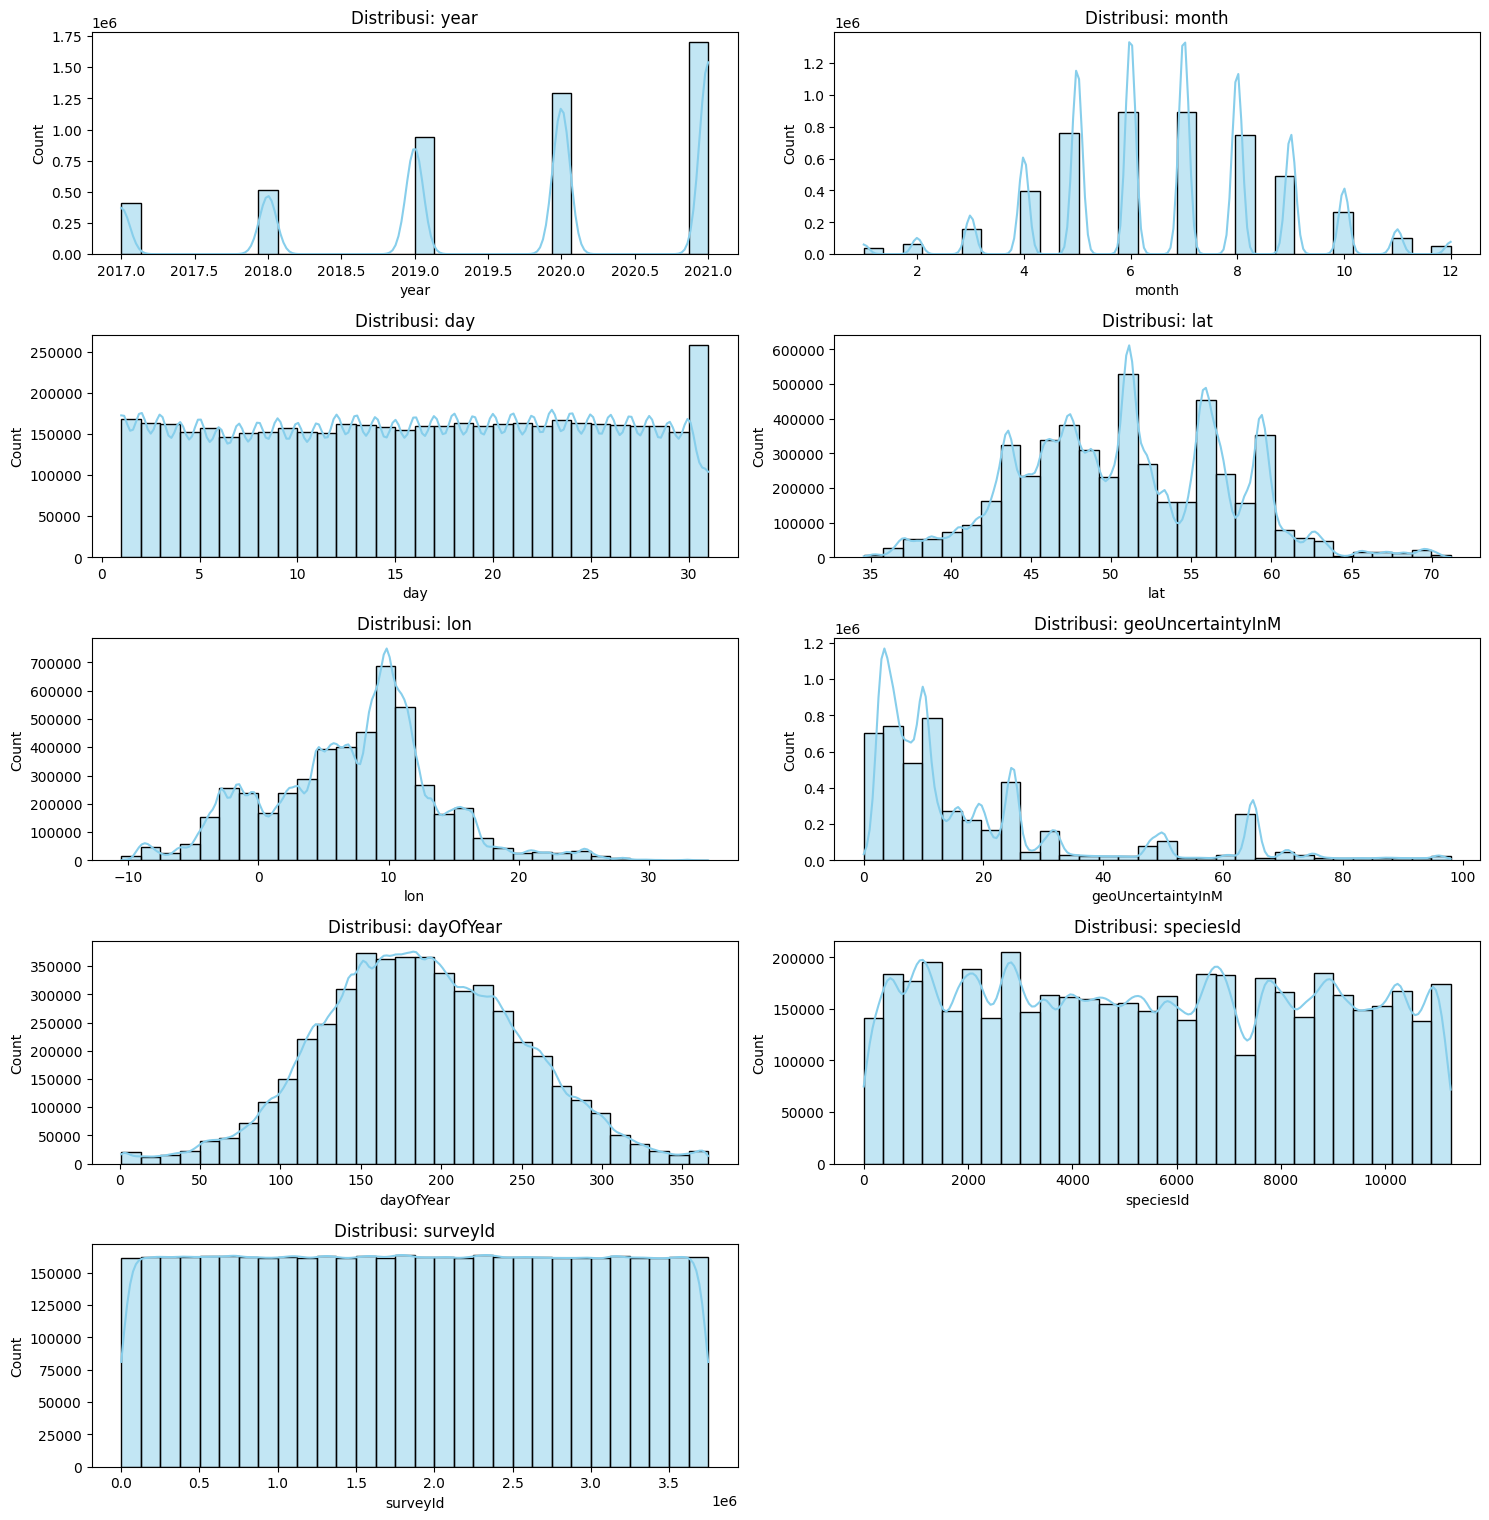

In [ ]:
numeric_cols_PA = df_PA.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, len(numeric_cols_PA)*3))
for i, col in enumerate(numeric_cols_PA, 1):
    plt.subplot(len(numeric_cols_PA), 2, i)
    sns.histplot(df_PA[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi: {col}')
plt.tight_layout()
plt.show()

**Penjelasan :**

Beberapa pola penting yang bisa diamati: 

- **year, month, day**: Data observasi terkonsentrasi pada tahun-tahun dan bulan-bulan tertentu, menandakan tidak semua waktu memiliki jumlah observasi yang merata.

- **lat dan lon**: Menunjukkan distribusi spasial observasi di wilayah Eropa, dengan konsentrasi tinggi di lintang 45–60 dan bujur 0–20.

- **geoUncertaintyInM**: Mayoritas data memiliki ketidakpastian geografis yang rendah (<20 meter), menandakan akurasi lokasi cukup baik.

- **dayOfYear**: Memiliki distribusi mendekati normal, mencerminkan aktivitas pengamatan merata sepanjang tahun namun sedikit lebih aktif di musim semi-musim panas.

- **speciesId dan surveyId**: Terdistribusi cukup merata, mengindikasikan cakupan spesies dan survei yang luas.

Visualisasi ini berguna untuk memahami struktur dan pola umum dalam data, serta mendeteksi potensi bias temporal atau spasial.

#####  Boxplot untuk Presence-Absence (PA)

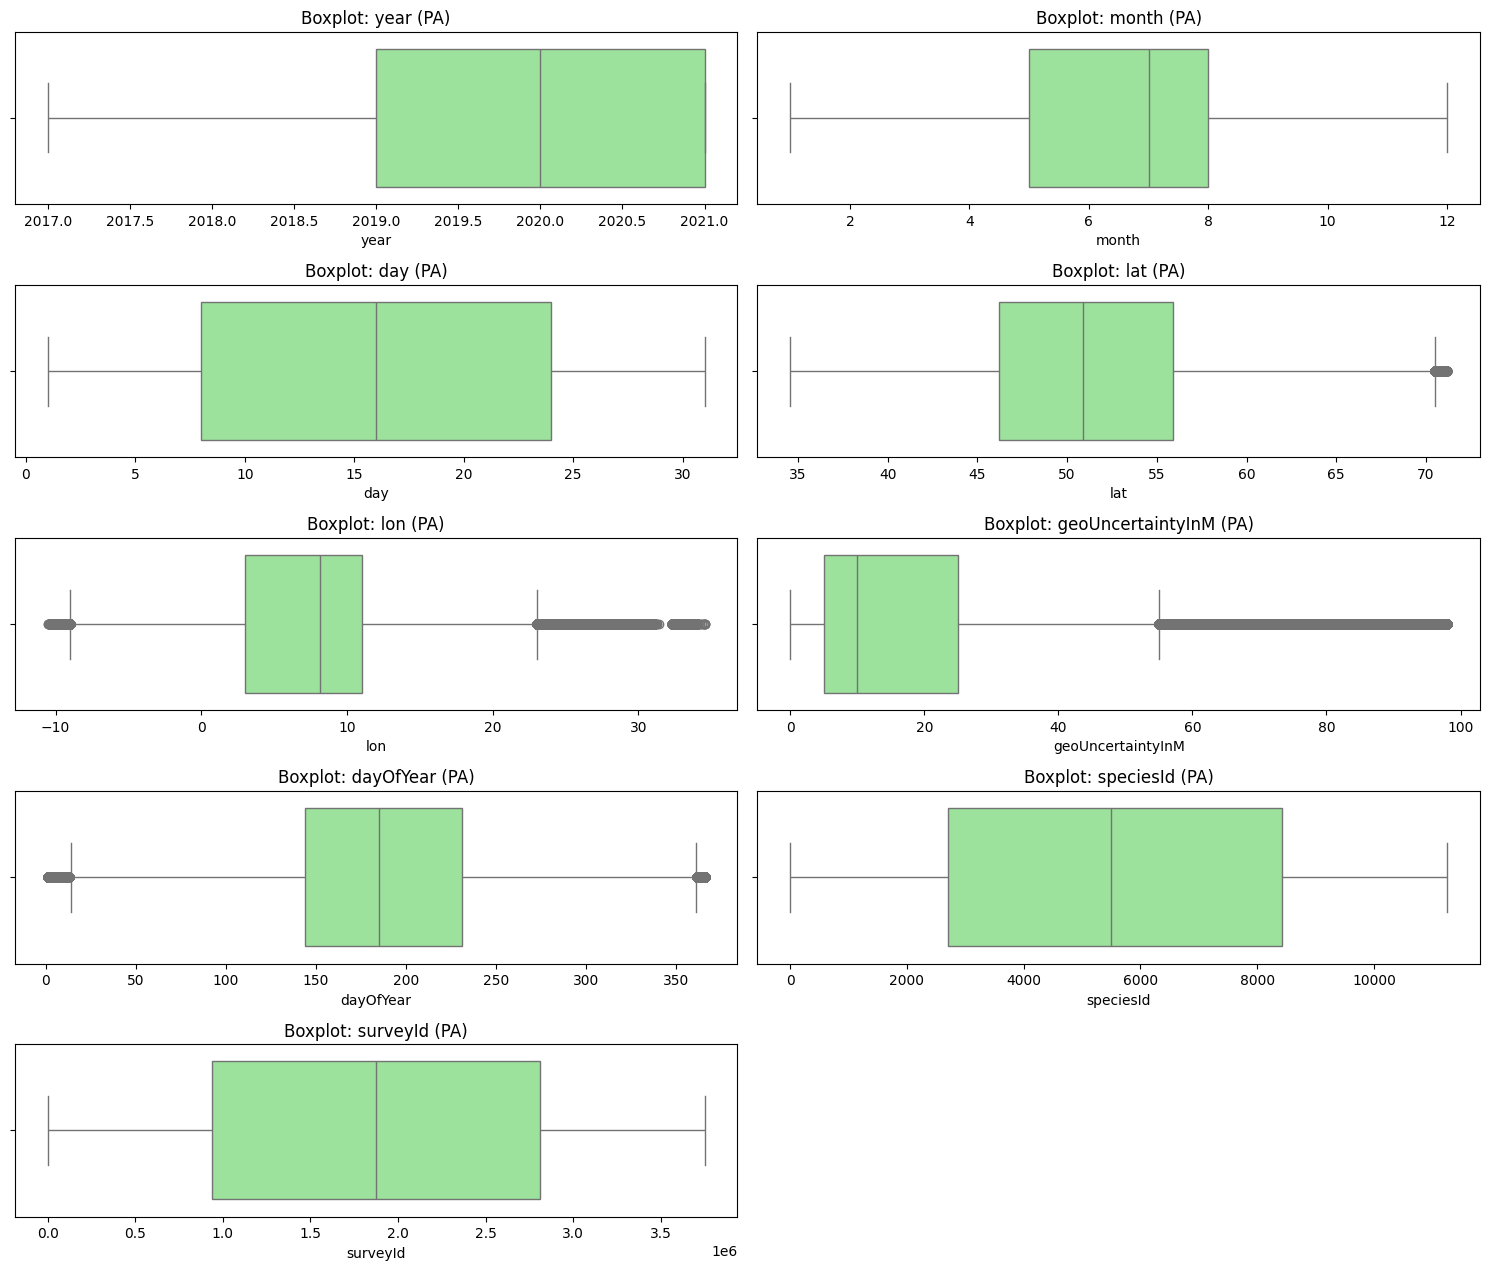

In [ ]:
numeric_cols_PA = df_PA.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, len(numeric_cols_PA)*2.5))
for i, col in enumerate(numeric_cols_PA, 1):
    plt.subplot(len(numeric_cols_PA), 2, i)
    sns.boxplot(data=df_PA, x=col, color='lightgreen')
    plt.title(f'Boxplot: {col} (PA)')
plt.tight_layout()
plt.show()

In [ ]:
numeric_cols = df_PA.select_dtypes(include=np.number)

corr_matrix = numeric_cols.corr()

print("Matriks Korelasi:")
print(corr_matrix)


Matriks Korelasi:
                       year     month       day       lat       lon  \
year               1.000000 -0.064127 -0.015049 -0.265101 -0.064001   
month             -0.064127  1.000000 -0.098840  0.110933  0.057392   
day               -0.015049 -0.098840  1.000000 -0.009864 -0.004258   
lat               -0.265101  0.110933 -0.009864  1.000000  0.350149   
lon               -0.064001  0.057392 -0.004258  0.350149  1.000000   
geoUncertaintyInM  0.043839 -0.065537 -0.020528 -0.076164 -0.021646   
dayOfYear         -0.064978  0.990018  0.042030  0.109621  0.056757   
speciesId         -0.006580  0.010074 -0.004518 -0.016112 -0.001918   
surveyId          -0.006083 -0.010502  0.012198 -0.002287 -0.006788   

                   geoUncertaintyInM  dayOfYear  speciesId  surveyId  
year                        0.043839  -0.064978  -0.006580 -0.006083  
month                      -0.065537   0.990018   0.010074 -0.010502  
day                        -0.020528   0.042030  -0.004518

##### Korelasi & Heatmap

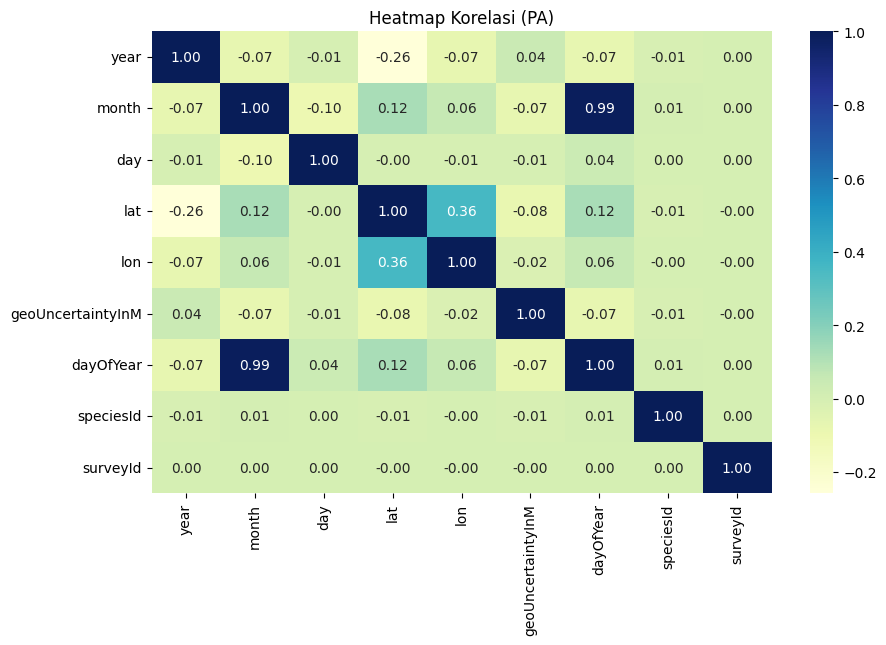

In [ ]:
corr_matrix_PA = df_PA[numeric_cols_PA].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_PA, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap Korelasi (PA)')
plt.show()

### Presence-Only (PO) occurrences

In [ ]:
# pada data P0
df_PO.head()

,lon,lat,year,geoUncertaintyInM,areaInM2,region,country,speciesId,surveyId
0,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,6874.0,212
1,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,476.0,212
2,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,11157.0,212
3,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,8784.0,212
4,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,4530.0,212


##### Statistik Deskriptif

In [ ]:
df_PO.describe()

,lon,lat,year,geoUncertaintyInM,areaInM2,speciesId,surveyId
count,1.483637e+06,1.483637e+06,1.483637e+06,1.471141e+06,1300365.0,1.483637e+06,1.483637e+06
mean,9.024850e+00,5.242552e+01,2.018179e+03,7.483046e+00,-inf,5.811442e+03,1.969927e+06
std,4.437247e+00,4.853112e+00,1.094525e+00,6.190821e+00,NaN,3.392812e+03,1.135967e+06
min,-9.018346e+00,3.511705e+01,2.017000e+03,0.000000e+00,-inf,2.000000e+00,2.120000e+02
25%,6.052593e+00,4.856769e+01,2.017000e+03,3.000000e+00,25.0,2.847000e+03,9.768390e+05
50%,9.380850e+00,5.515287e+01,2.018000e+03,1.000000e+01,79.0,6.079000e+03,1.976273e+06
75%,1.041882e+01,5.626047e+01,2.019000e+03,1.000000e+01,79.0,8.818000e+03,2.960059e+06
max,2.915421e+01,5.989300e+01,2.021000e+03,1.000000e+02,8000.0,1.125400e+04,3.919655e+06


In [ ]:
df_PO.shape

(1483637, 9)

In [ ]:
df_PO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483637 entries, 0 to 1483636
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   lon                1483637 non-null  float64
 1   lat                1483637 non-null  float64
 2   year               1483637 non-null  int64  
 3   geoUncertaintyInM  1471141 non-null  float64
 4   areaInM2           1300365 non-null  float64
 5   region             1483637 non-null  object 
 6   country            1483637 non-null  object 
 7   speciesId          1483637 non-null  float64
 8   surveyId           1483637 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 101.9+ MB


##### Missing Values

In [ ]:
print(df_PO.isnull().sum())

print(df_PO.duplicated().sum())

# Mengecek nilai unik di setiap kolom
for col in df_P0.columns:
    print(f"{col}: {df_P0[col].nunique()} nilai unik")


lon                      0
lat                      0
year                     0
geoUncertaintyInM      741
areaInM2             12583
region                   0
country                  0
speciesId                1
surveyId                 1
dtype: int64
1758
lon: 5872 nilai unik
lat: 5862 nilai unik
year: 5 nilai unik
geoUncertaintyInM: 17 nilai unik
areaInM2: 118 nilai unik
region: 7 nilai unik
country: 25 nilai unik
speciesId: 2925 nilai unik
surveyId: 5891 nilai unik


##### Distribusi Lokasi

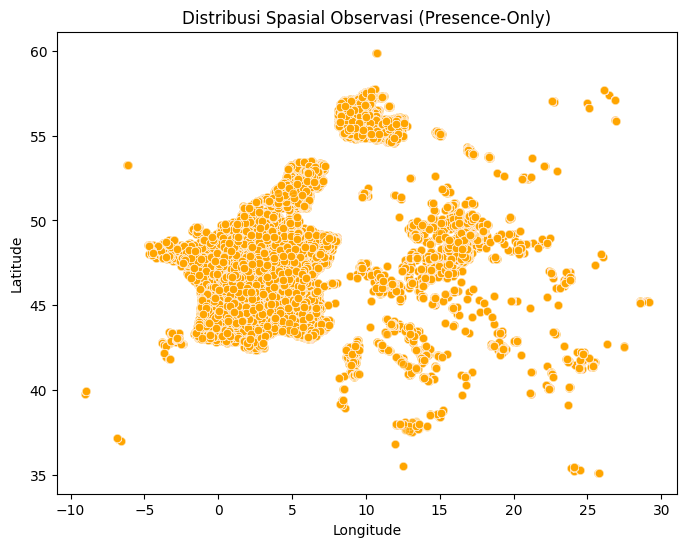

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='lon', y='lat', data=df_PO, alpha=0.4, color='orange')
plt.title('Distribusi Spasial Observasi (Presence-Only)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

##### Distribusi Tahun

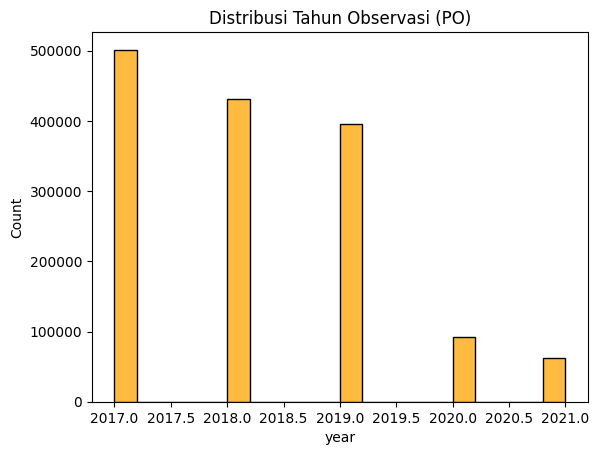

In [ ]:
sns.histplot(df_PO['year'].dropna(), bins=20, kde=False, color='orange')
plt.title('Distribusi Tahun Observasi (PO)')
plt.show()

##### Distribusi Kolom Numerik

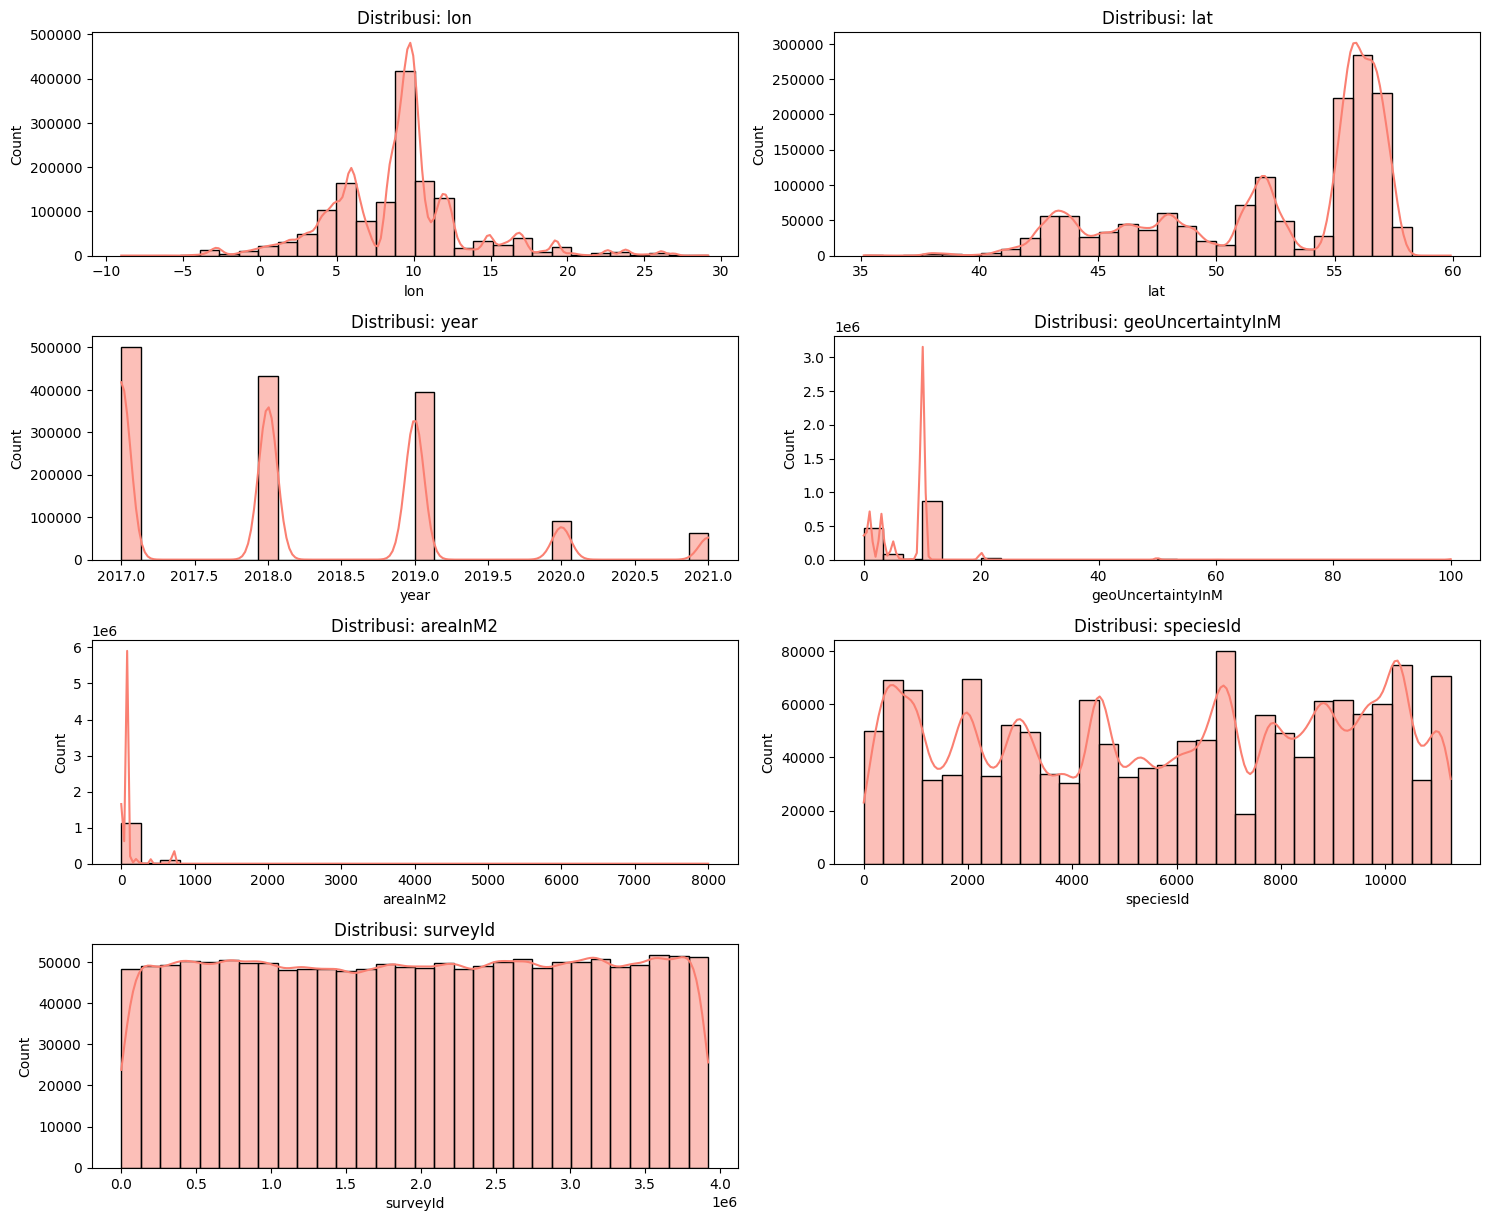

In [ ]:
numeric_cols_PO = df_PO.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, len(numeric_cols_PO)*3))
for i, col in enumerate(numeric_cols_PO, 1):
    plt.subplot(len(numeric_cols_PO), 2, i)
    sns.histplot(df_PO[col], kde=True, bins=30, color='salmon')
    plt.title(f'Distribusi: {col}')
plt.tight_layout()
plt.show()

##### Boxplot untuk Presence-Only (PO)

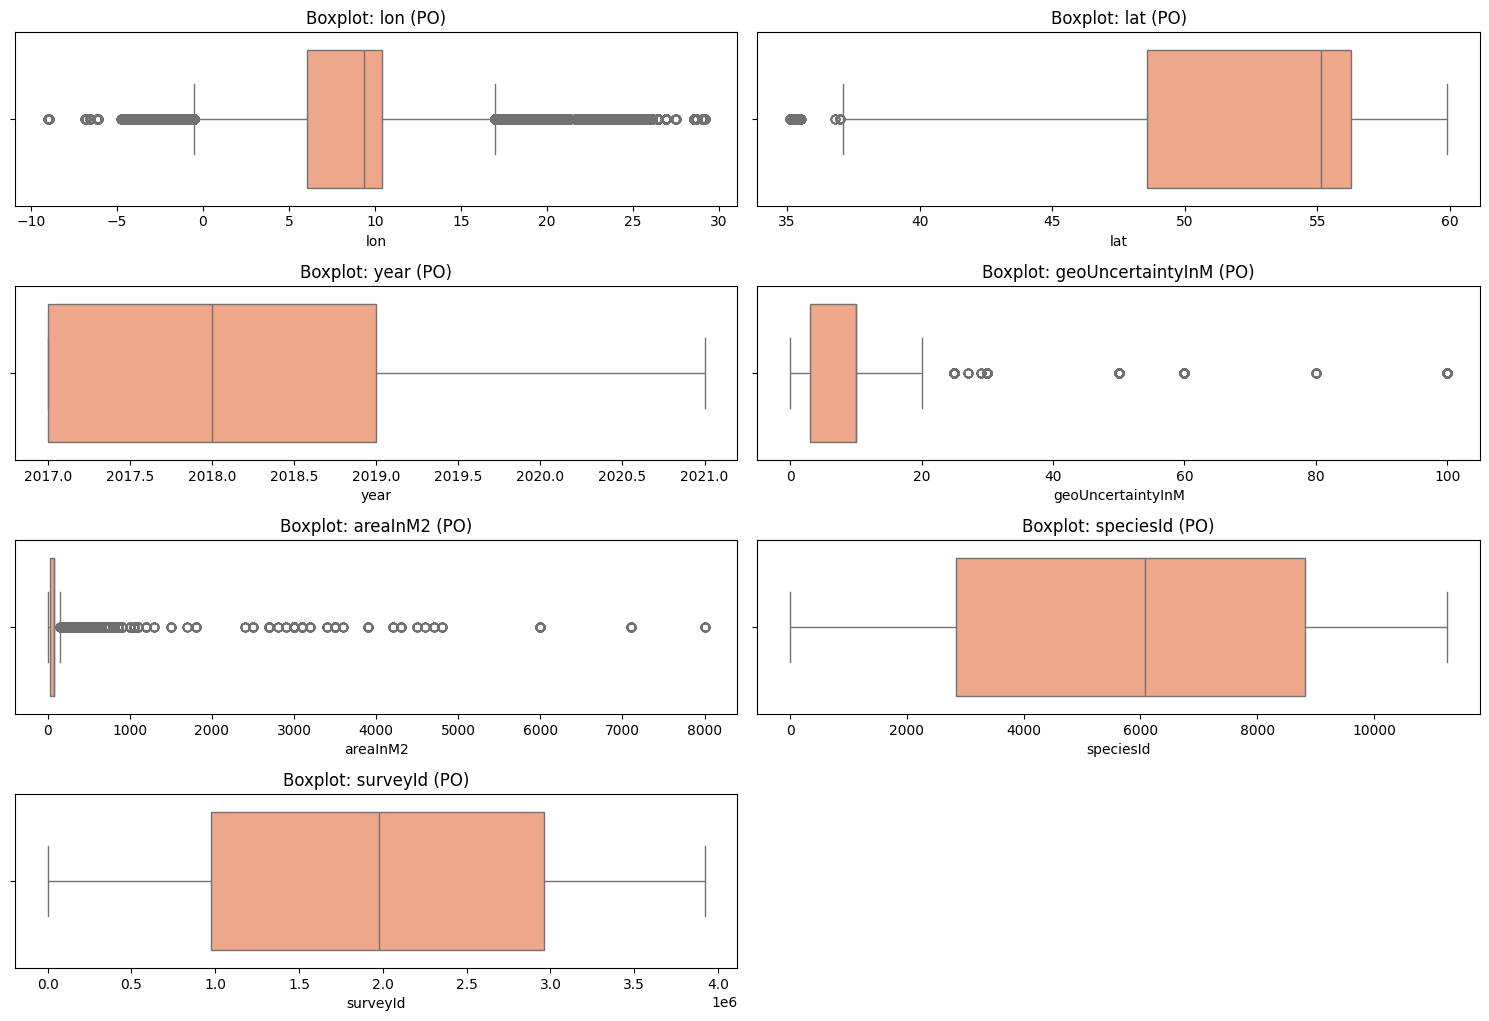

In [ ]:
numeric_cols_PO = df_PO.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, len(numeric_cols_PO)*2.5))
for i, col in enumerate(numeric_cols_PO, 1):
    plt.subplot(len(numeric_cols_PO), 2, i)
    sns.boxplot(data=df_PO, x=col, color='lightsalmon')
    plt.title(f'Boxplot: {col} (PO)')
plt.tight_layout()
plt.show()

In [ ]:
numeric_cols = df_PO.select_dtypes(include=np.number)

corr_matrix = numeric_cols.corr()

print("Matriks Korelasi:")
print(corr_matrix)


Matriks Korelasi:
                        lon       lat      year  geoUncertaintyInM  areaInM2  \
lon                1.000000  0.193349  0.024198           0.343205  0.038123   
lat                0.193349  1.000000 -0.185559           0.338754  0.105872   
year               0.024198 -0.185559  1.000000          -0.054645 -0.075570   
geoUncertaintyInM  0.343205  0.338754 -0.054645           1.000000  0.040744   
areaInM2           0.038123  0.105872 -0.075570           0.040744  1.000000   
speciesId          0.003009  0.014907  0.003626           0.001994 -0.017997   
surveyId           0.006114 -0.000452 -0.006669          -0.000538  0.003576   

                   speciesId  surveyId  
lon                 0.003009  0.006114  
lat                 0.014907 -0.000452  
year                0.003626 -0.006669  
geoUncertaintyInM   0.001994 -0.000538  
areaInM2           -0.017997  0.003576  
speciesId           1.000000  0.000730  
surveyId            0.000730  1.000000  


##### Korelasi & Heatmap

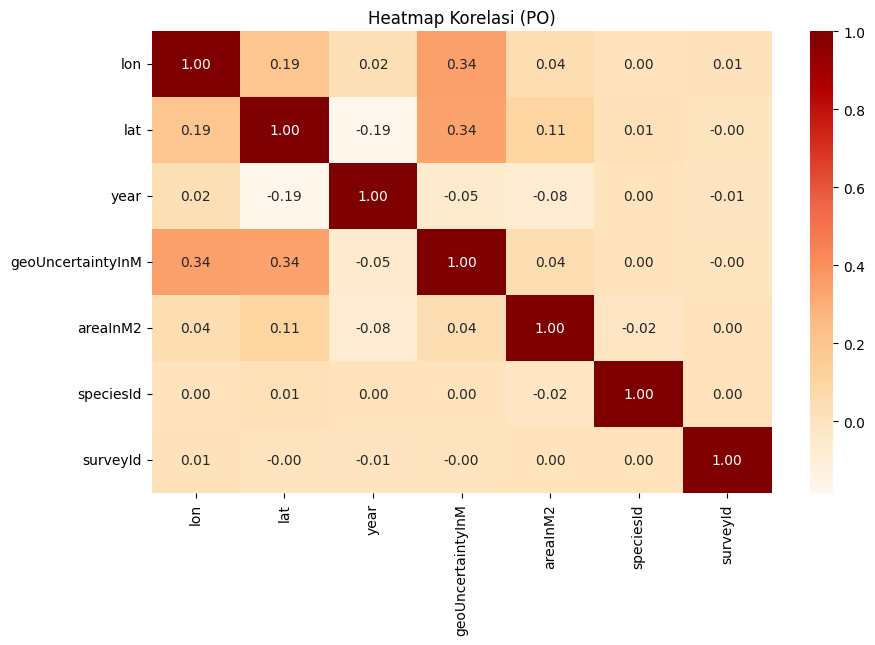

In [ ]:
corr_matrix_PO = df_PO[numeric_cols_PO].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_PO, annot=True, cmap='OrRd', fmt='.2f')
plt.title('Heatmap Korelasi (PO)')
plt.show()

# Data Preparation

#### Memilah Data (Data Selection)

In [ ]:
print("Kolom pada df_PA:")
print(df_PA.columns.tolist())

print("Kolom pada df_PO:")
print(df_PO.columns.tolist())

Kolom pada df_PA:
['lat', 'lon', 'year', 'month', 'day', 'geoUncertaintyInM', 'speciesId', 'surveyId']
Kolom pada df_PO:
['lat', 'lon', 'year', 'geoUncertaintyInM', 'speciesId', 'surveyId']


In [ ]:
selected_cols_PA = ['lat', 'lon', 'year', 'month', 'day', 'geoUncertaintyInM', 'speciesId', 'surveyId']
selected_cols_PO = ['lat', 'lon', 'year', 'geoUncertaintyInM', 'speciesId', 'surveyId']

df_PA = df_PA[selected_cols_PA].copy()
df_PO = df_PO[selected_cols_PO].copy()

In [ ]:
print(df_PA.columns.tolist())
print(df_PO.columns.tolist())

['lat', 'lon', 'year', 'month', 'day', 'geoUncertaintyInM', 'speciesId', 'surveyId']
['lat', 'lon', 'year', 'geoUncertaintyInM', 'speciesId', 'surveyId']


#### Membersihkan Data (Data Cleaning)

In [ ]:
print("Nilai kosong (PA):\n", df_PA.isnull().sum())
print("Nilai kosong (PO):\n", df_PO.isnull().sum())

print("Jumlah baris duplikat (PA):", df_PA.duplicated().sum())
print("Jumlah baris duplikat (PO):", df_PO.duplicated().sum())

Nilai kosong (PA):
 lat                     0
lon                     0
year                    0
month                 465
day                  1738
geoUncertaintyInM       1
speciesId               1
surveyId                1
dtype: int64
Nilai kosong (PO):
 lat                      0
lon                      0
year                     0
geoUncertaintyInM    12496
speciesId                0
surveyId                 0
dtype: int64
Jumlah baris duplikat (PA): 65028
Jumlah baris duplikat (PO): 48172


In [ ]:
df_PA_clean = df_PA.dropna().drop_duplicates()
df_PO_clean = df_PO.dropna().drop_duplicates()

In [ ]:
print(df_PA_clean.shape)
print(df_PO_clean.shape)

(4793555, 8)
(1423864, 6)


#### Mengontruksi Label Data (Label Construction)

In [ ]:
df_PA_clean['label'] = 1  # PA assumed presence
df_PO_clean['label'] = 1  # PO always presence

In [ ]:
print("Distribusi label PA:", df_PA_clean['label'].value_counts().to_dict())
print("Distribusi label PO:", df_PO_clean['label'].value_counts().to_dict())

Distribusi label PA: {1: 4793555}
Distribusi label PO: {1: 1423864}


#### Menentukan Label Data (Label Definition)

Hasil distribusi label :

`Distribusi label PA: {1: 4,793,555}` \
`Distribusi label PO: {1: 1,423,864}`

Dan semua label bernilai 1, Karena semua data PO adalah presence only, dan asumsi data PA adalah presence, maka label 1 menunjukkan kehadiran (presence = 1).

#### Mengintegrasikan Data (Data Integration)

In [ ]:
common_cols = ['lat', 'lon', 'year', 'geoUncertaintyInM', 'speciesId', 'surveyId', 'label']
df_combined = pd.concat([
    df_PA_clean[common_cols],
    df_PO_clean[common_cols]
], axis=0, ignore_index=True)

Data PO & PA digabung menjadi satu df_combined

In [ ]:
print("Ukuran data gabungan:", df_combined.shape)
print("Contoh data gabungan:\n", df_combined.head())

Ukuran data gabungan: (6217419, 7)
Contoh data gabungan:
         lat       lon  year  geoUncertaintyInM  speciesId  surveyId  label
0  43.74605  1.573057  2019                6.0     3383.0       1.0      1
1  42.12559  0.314948  2021                5.0     1152.0       2.0      1
2  48.29520 -0.934518  2021               24.9     6772.0       3.0      1
3  53.63367 -2.644535  2021                8.0     3318.0       4.0      1
4  49.79471  7.925086  2021               15.0     3374.0       5.0      1


# Modeling

## Membangun Skenario Pengujian

🎯 Tujuan:
Memprediksi kehadiran spesies (label = 1) di suatu lokasi berdasarkan citra satelit patch (RGB + NIR) yang direpresentasikan dalam file .tiff berukuran 64x64 piksel.

## 🧪 Skenario Pengujian: Location-based Species Presence Prediction

| **Komponen**     | **Deskripsi**                                                                 |
|------------------|-------------------------------------------------------------------------------|
| **Input**        | Patch citra lokasi (TIFF, RGB + NIR, ukuran 64x64 piksel)                    |
| **Target**       | Label `1` (species hadir) – sementara belum digunakan label `0` (absence)     |
| **Dataset**      | File `.tiff` per `surveyId`, diambil dari folder `/SatelliteImages/`         |
| **Teknik**       | Convolutional Neural Network (CNN)                                           |
| **Output Model** | Probabilitas kehadiran spesies pada lokasi tertentu                          |
| **Evaluasi**     | Akurasi, Confusion Matrix, Classification Report                             |


## Mempersiapkan Dataset Gambar & Label

###  Fungsi load citra dari folder fleksibel:

In [72]:
import os
import numpy as np
from PIL import Image
import glob

def load_image_from_surveyid(survey_id, base_path='/content/SatelliteImages/'):
    pattern = os.path.join(base_path, '**', f'{survey_id}.tiff')
    matches = glob.glob(pattern, recursive=True)
    if matches:
        try:
            img = Image.open(matches[0]).resize((64, 64))
            return np.array(img)
        except:
            return None
    return None

### Membentuk dataset citra:

In [ ]:
image_data = []
image_labels = []

for idx, row in df_combined.iterrows():
    img = load_image_from_surveyid(int(row['surveyId']))
    if img is not None and img.shape == (64, 64, 4):  # pastikan RGB+NIR
        image_data.append(img)
        image_labels.append(row['label'])

print("Jumlah patch gambar berhasil dimuat:", len(image_data))

### Normalisasi dan pembagian data:

In [ ]:
from sklearn.model_selection import train_test_split

X = np.array(image_data) / 255.0  # Normalisasi [0,1]
y = np.array(image_labels)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

### Membangun Model CNN

### Arsitektur Model CNN Sederhana:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 4)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


### Training Model:

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

### Evaluasi Model:

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi Test Set: {accuracy:.4f}")

# Prediksi dan evaluasi lebih lanjut
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

### Visualisasi Hasil Training

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Model CNN Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
